# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [2]:
df = pd.read_csv("air_bnb.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


# Missing Value Handling

In [3]:
# Melihat total missing value untuk setiap kolom
print(df.isnull().sum())
print("Total rows yang mengandung missing value : ", sum([True for idx,row in df.iterrows() if any(row.isnull())]))

id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64
Total rows yang mengandung missing value :  3965


#### karena banyaknya "missing value" masih sangat sedikit jika dibanding total data, maka row yang mengandung "missing value" dihilangkan saja

In [4]:
df0 = df.dropna()
df0.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [5]:
df0.shape

(18587, 16)

In [6]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18587.0,1.529028e+07,8.456565e+06,2015.000000,7.797145e+06,1.643876e+07,2.218477e+07,2.984956e+07
host_id,18587.0,5.192363e+07,5.660290e+07,2217.000000,8.579471e+06,2.892871e+07,7.724873e+07,2.242958e+08
latitude,18587.0,5.250992e+01,3.054319e-02,52.345803,5.248920e+01,5.250921e+01,5.253265e+01,5.264150e+01
longitude,18587.0,1.340635e+01,5.724897e-02,13.103557,1.337642e+01,1.341686e+01,1.343913e+01,1.375764e+01
price,18587.0,6.199096e+01,1.458745e+02,0.000000,3.000000e+01,4.600000e+01,7.000000e+01,8.600000e+03
minimum_nights,18587.0,6.536127e+00,4.315639e+01,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,5.000000e+03
number_of_reviews,18587.0,2.161769e+01,3.946408e+01,1.000000,3.000000e+00,7.000000e+00,2.100000e+01,4.980000e+02
reviews_per_month,18587.0,1.138112e+00,1.508100e+00,0.010000,1.800000e-01,5.400000e-01,1.510000e+00,3.667000e+01
calculated_host_listings_count,18587.0,1.933502e+00,3.766036e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,4.500000e+01
availability_365,18587.0,8.433432e+01,1.205139e+02,0.000000,0.000000e+00,8.000000e+00,1.450000e+02,3.650000e+02


# Feature Engineering

In [7]:
list(df0.columns) 

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [8]:

len(df['room_type'].unique())

3

# Menghitung correlation antar fitur

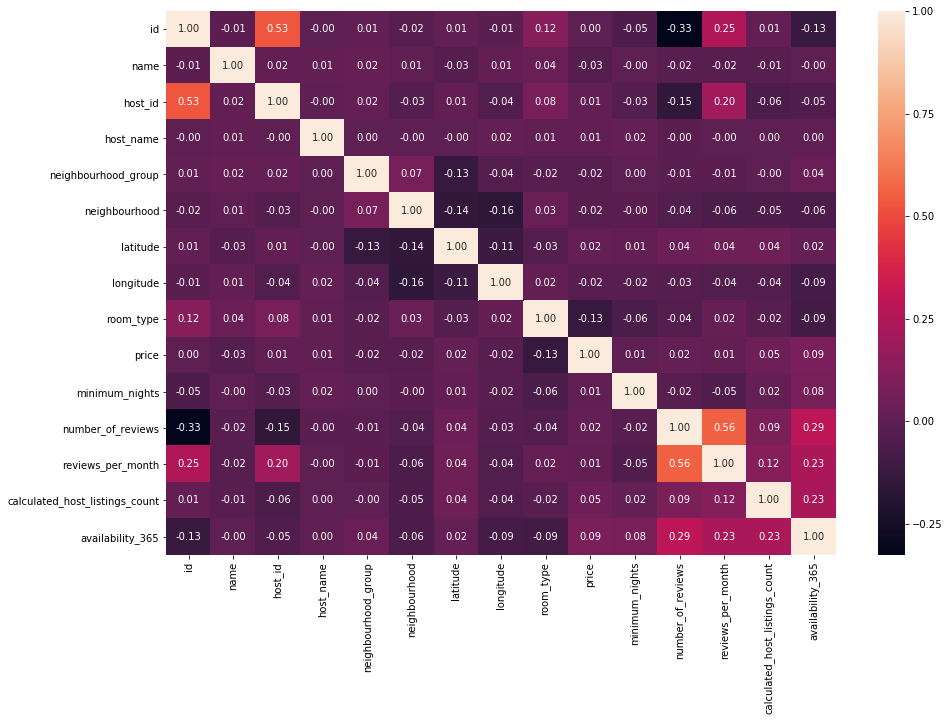

In [9]:
# Melakukan label encoder untuk kolom yang bertipe kategorikal
df_le = df0.copy()
le = LabelEncoder()

categoricals = [
    'name',
    'host_name',
    'neighbourhood_group',
    'neighbourhood',
    'room_type',
] 
for col in categoricals:
    df_le[col] = le.fit_transform(df_le[col])
plt.figure(figsize=(15, 10))
sns.heatmap(df_le.corr(), annot=True, fmt='.2f');

In [10]:
# Drop kolom yang tidak digunakan
cols = [
    'id',
    'name',
    'host_id',
    'host_name',
    'latitude',
    'longitude',
    'last_review',
    'reviews_per_month',
]
cleaned = df_le.drop(cols, axis=1)
cleaned

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,4,18,0,60,4,118,4,141
1,6,95,1,17,2,6,1,0
2,6,98,0,90,62,143,1,220
3,10,110,1,26,5,25,1,297
4,6,49,1,42,2,197,1,26
...,...,...,...,...,...,...,...,...
22449,2,76,1,25,2,1,1,32
22463,11,84,0,99,1,5,2,339
22475,1,32,1,25,1,1,1,8
22508,6,95,0,70,1,1,1,350


In [11]:
# Simpan data yang sudah dipreproses
X = cleaned.drop('room_type', axis = 1)
Y = cleaned['room_type']
cleaned.to_csv('airbnb_cleaned.csv', index=False)